In [0]:
import torch
import torch.nn as nn
import torch.optim as optim

import os
import json
import time
import random
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

from IPython.display import Image

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

SEED = 1
random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

### Common parameters

In [0]:
batch_size = 32
# Percentage of training data
learning_rate = 0.001

## n-copy task dataset

The entire dataset comprises of the binary representation of all numbers uptil a range defined. The binary sequence from left to right (most significant to least significant) is the input. The target is just the reverse sequence.

In [7]:
from seq_seq_different import create_ncopy_task

START = torch.tensor([1,1]).to(device)
train_loader, test_loader, valid_loader = create_ncopy_task(sequence_length=15, 
                                                            n_copy=10,
                                                            batch_size=batch_size,
                                                            start_token=1,
                                                            train_test_ratio=0.9, 
                                                            train_valid_ratio=0.8,
                                                            verbose=True)

torch.Size([16, 9000, 2]) torch.Size([151, 9000, 2])
torch.Size([16, 1000, 2]) torch.Size([151, 1000, 2])


# LSTM

In [0]:
# Input dim
input_dim = 2
# Number of hidden nodes
hidden_dim = 32
# Number of output nodes
output_dim = 2
# Number of LSTMs cells to be stacked
layers = 1
# Boolean value for bidirectioanl or not
bidirectional = True
# Boolean value to use LayerNorm or not
layernorm = True

## Our implementation

In [0]:
from seq_seq_different import LSTMSeq2SeqDifferent

our = LSTMSeq2SeqDifferent(input_dim, hidden_dim, output_dim, bidirectional=bidirectional, 
                           layers=layers, layernorm=layernorm).to(device)

print("Our implementation\n{}".format("=" * len("Our implementation")))
print("# of parameters: {}".format(our.count_parameters()))
for name, param in our.named_parameters():
    print("{:<40}: {}".format(name, param.shape))

Our implementation
# of parameters: 27522
encoder.model.0.weights                 : torch.Size([34, 128])
encoder.model.0.bias                    : torch.Size([128])
encoder.model.0.ln_gates.weight         : torch.Size([128])
encoder.model.0.ln_gates.bias           : torch.Size([128])
encoder.model.0.ln_candidate.weight     : torch.Size([32])
encoder.model.0.ln_candidate.bias       : torch.Size([32])
encoder.model_rev.0.weights             : torch.Size([34, 128])
encoder.model_rev.0.bias                : torch.Size([128])
encoder.model_rev.0.ln_gates.weight     : torch.Size([128])
encoder.model_rev.0.ln_gates.bias       : torch.Size([128])
encoder.model_rev.0.ln_candidate.weight : torch.Size([32])
encoder.model_rev.0.ln_candidate.bias   : torch.Size([32])
decoder.model.0.weights                 : torch.Size([66, 256])
decoder.model.0.bias                    : torch.Size([256])
decoder.model.0.ln_gates.weight         : torch.Size([256])
decoder.model.0.ln_gates.bias           : torch.Si

Beginning training model with 27522 parameters
Files will be saved in: dump/Seq2SeqDifferent/

Epoch #1: Batch 225/225 -- Loss = 0.6515399217605591; Time taken: 0.46451616287231445s
Epoch #1: Average loss is 0.6728919953770107
Epoch #1: Train F1 is 0.6622557885971484
Epoch #1: Validation F1 is 0.6617258883248732
Time taken for epoch: 151.5590431690216s

Epoch #2: Batch 225/225 -- Loss = 0.6431607007980347; Time taken: 0.4668121337890625ss
Epoch #2: Average loss is 0.6349373835987515
Time taken for epoch: 105.04991316795349s

Epoch #3: Batch 225/225 -- Loss = 0.7124704122543335; Time taken: 0.46477770805358887s
Epoch #3: Average loss is 0.6731014895439148
Time taken for epoch: 105.01866436004639s

Epoch #4: Batch 225/225 -- Loss = 0.6943488717079163; Time taken: 0.467041015625s303ss
Epoch #4: Average loss is 0.700743449529012
Time taken for epoch: 105.2679283618927s

Epoch #5: Batch 225/225 -- Loss = 0.6926679015159607; Time taken: 0.4675862789154053ss
Epoch #5: Average loss is 0.693610

Epoch #42: Batch 225/225 -- Loss = 0.6894994378089905; Time taken: 0.4621548652648926ss
Epoch #42: Average loss is 0.6898356726434496
Time taken for epoch: 104.34105157852173s

Epoch #43: Batch 225/225 -- Loss = 0.6893659234046936; Time taken: 0.4636201858520508ss
Epoch #43: Average loss is 0.6896446858512031
Time taken for epoch: 104.68857765197754s

Epoch #44: Batch 225/225 -- Loss = 0.6895579695701599; Time taken: 0.4610002040863037ss
Epoch #44: Average loss is 0.6893148276540968
Time taken for epoch: 104.22538471221924s

Epoch #45: Batch 225/225 -- Loss = 0.6925036907196045; Time taken: 0.4599723815917969ss
Epoch #45: Average loss is 0.6939699705441793
Epoch #45: Train F1 is 0.49872868926129016
Epoch #45: Validation F1 is 0.49807234845377735
Time taken for epoch: 149.02803015708923s

Epoch #46: Batch 225/225 -- Loss = 0.6919465661048889; Time taken: 0.46613383293151855s
Epoch #46: Average loss is 0.692905150519477
Time taken for epoch: 104.63224649429321s

Epoch #47: Batch 225/225 

Epoch #84: Batch 225/225 -- Loss = 0.4790632724761963; Time taken: 0.4677715301513672sss
Epoch #84: Average loss is 0.4759788786040412
Time taken for epoch: 104.92479109764099s

Epoch #85: Batch 225/225 -- Loss = 0.479187935590744; Time taken: 0.46527838706970215s5s
Epoch #85: Average loss is 0.4694828885131412
Epoch #85: Train F1 is 0.7648113245609485
Epoch #85: Validation F1 is 0.7649052688213366
Time taken for epoch: 150.63849139213562s

Epoch #86: Batch 225/225 -- Loss = 0.46712952852249146; Time taken: 0.466156005859375sss
Epoch #86: Average loss is 0.4627353122499254
Time taken for epoch: 104.97752237319946s

Epoch #87: Batch 225/225 -- Loss = 0.4699142575263977; Time taken: 0.4685678482055664s5s
Epoch #87: Average loss is 0.4608118250634935
Time taken for epoch: 104.68876719474792s

Epoch #88: Batch 225/225 -- Loss = 0.45312535762786865; Time taken: 0.46821117401123047s
Epoch #88: Average loss is 0.44908561759524873
Time taken for epoch: 105.1835949420929s

Epoch #89: Batch 225/

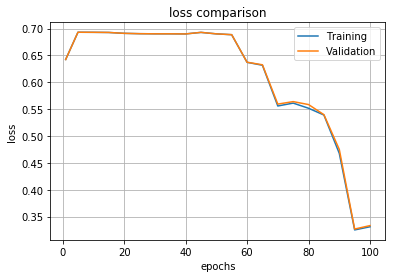

In [0]:
from seq_seq_different import Seq2SeqDifferent

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(our.parameters(), lr=learning_rate)
out_dir = 'dump/Seq2SeqDifferent/'

task_our = Seq2SeqDifferent(model=our, optimizer=optimizer, loss_fn=loss_fn, device=device)

our, our_stats = task_our.train(100, train_loader, valid_loader, teacher_forcing=0.5, freq=5,
                                out_dir=out_dir)

In [0]:
# task_our.model.load("dump/Seq2SeqDifferent/model_epoch_45.pkl")

### Evaluate

In [0]:
our_f1 = task_our.evaluate(test_loader, True)
print(our_f1)

Confusion Matrix: 
 [[74232  1098]
 [ 1538 73132]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     75330
           1       0.99      0.98      0.98     74670

   micro avg       0.98      0.98      0.98    150000
   macro avg       0.98      0.98      0.98    150000
weighted avg       0.98      0.98      0.98    150000

(0.9822968435191404, 0.33045421727001667)


In [0]:
for x, y in test_loader:
    x = x.to(device)
    y = y.to(device)
    break
print(x.shape, y.shape)
h = torch.zeros(2 * layers, x.shape[1], our.hidden_dim).to(device)
c = torch.zeros(2 * layers, x.shape[1], our.hidden_dim).to(device)
o = our(x, y, h, c, 0)

torch.Size([15, 32, 2]) torch.Size([150, 32, 2])


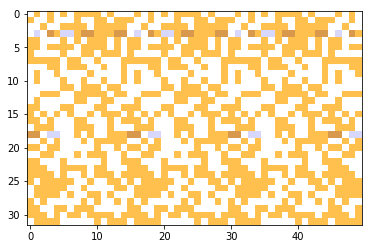

In [0]:
z1 = torch.transpose(torch.argmax(y[-50:],2), 1, 0).detach().cpu().long().numpy()
z2 = torch.transpose(o[-50:,:,1], 1, 0).detach().cpu().numpy()
z2 = np.round(z2).astype(int)
# print(z1[0,:10])
# print(z2[0,:10])
# print(np.bitwise_xor(z1[0, :10], z2[0, :10]))

from matplotlib.colors import ListedColormap
# plt.matshow(np.bitwise_xor(z1, z2), cmap=cmap)
cmap1 = ListedColormap(['w', 'blue'])
img1 = plt.imshow(np.bitwise_xor(z1, z2), cmap=cmap1, alpha=0.5)
cmap2 = ListedColormap(['w', 'orange'])
img2 = plt.imshow(z1, cmap=cmap2, alpha=0.7)
plt.tick_params(labelsize=0, left=False, bottom=False)
plt.savefig(os.path.join(out_dir, 'test.png'), transparent = True, 
            bbox_inches = 'tight', pad_inches = 0, dpi=300)
plt.show()

### Test with longer output

In [0]:
long_output_train_loader, \
long_output_test_loader, \
long_output_val_loader = create_ncopy_task(sequence_length=15, 
                                           n_copy=20,
                                           batch_size=batch_size, 
                                           train_test_ratio=0.9, 
                                           train_valid_ratio=0.8)


our_f1 = task_our.evaluate(long_output_test_loader, True)
print(our_f1)

for x, y in long_output_test_loader:
    x = x.to(device)
    y = y.to(device)
    break

h = torch.zeros(2 * layers, x.shape[1], our.hidden_dim).to(device)
c = torch.zeros(2 * layers, x.shape[1], our.hidden_dim).to(device)
o = our(x, y, h, c, 0)

torch.Size([15, 9000, 2]) torch.Size([300, 9000, 2])
torch.Size([15, 1000, 2]) torch.Size([300, 1000, 2])
Confusion Matrix: 
 [[145069   2431]
 [  3511 148989]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98    147500
           1       0.98      0.98      0.98    152500

   micro avg       0.98      0.98      0.98    300000
   macro avg       0.98      0.98      0.98    300000
weighted avg       0.98      0.98      0.98    300000

(0.980448802316399, 0.33337528817355633)


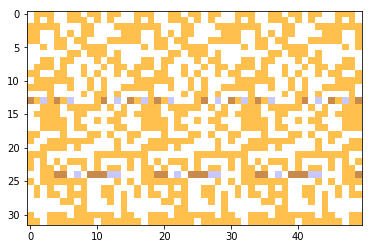

In [0]:
z1 = torch.transpose(torch.argmax(y,2), 1, 0).detach().cpu().long().numpy()
z1[:,0] = 1
z2 = torch.transpose(o[:,:,1], 1, 0).detach().cpu().numpy()
z2 = np.round(z2).astype(int)
# print(z1[0,:10])
# print(z2[0,:10])
# print(np.bitwise_xor(z1[0, :10], z2[0, :10]))

from matplotlib.colors import ListedColormap
# plt.matshow(np.bitwise_xor(z1, z2), cmap=cmap)
cmap1 = ListedColormap(['w', 'blue'])
img1 = plt.imshow(np.bitwise_xor(z1, z2), cmap=cmap1, alpha=0.7)
cmap2 = ListedColormap(['w', 'orange'])
img2 = plt.imshow(z1, cmap=cmap2, alpha=0.7)
plt.tick_params(labelsize=0, left=False, bottom=False)
plt.savefig(os.path.join(out_dir, 'longer_output.png'), transparent = True, 
            bbox_inches = 'tight', pad_inches = 0, dpi=300)
plt.show()

### Test with longer input

In [0]:
long_input_train_loader, \
long_input_test_loader, \
long_input_val_loader = create_ncopy_task(sequence_length=25, 
                                           n_copy=10,
                                           batch_size=batch_size, 
                                           train_test_ratio=0.9, 
                                           train_valid_ratio=0.8)


our_f1 = task_our.evaluate(long_input_test_loader, True)
print(our_f1)

for x, y in long_input_test_loader:
    x = x.to(device)
    y = y.to(device)
    break

h = torch.zeros(2 * layers, x.shape[1], our.hidden_dim).to(device)
c = torch.zeros(2 * layers, x.shape[1], our.hidden_dim).to(device))
o = our(x, y, h, c, 0)

torch.Size([25, 9000, 2]) torch.Size([250, 9000, 2])
torch.Size([25, 1000, 2]) torch.Size([250, 1000, 2])
Confusion Matrix: 
 [[75581 50739]
 [53135 70545]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.60      0.59    126320
           1       0.58      0.57      0.58    123680

   micro avg       0.58      0.58      0.58    250000
   macro avg       0.58      0.58      0.58    250000
weighted avg       0.58      0.58      0.58    250000

(0.5759621821982005, 0.727789830416441)


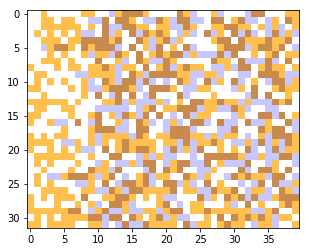

In [0]:
z1 = torch.transpose(torch.argmax(y,2), 1, 0).detach().cpu().long().numpy()
z1[:,0] = 1
z2 = torch.transpose(o[:,:,1], 1, 0).detach().cpu().numpy()
z2 = np.round(z2).astype(int)
# print(z1[0,:10])
# print(z2[0,:10])
# print(np.bitwise_xor(z1[0, :10], z2[0, :10]))

from matplotlib.colors import ListedColormap
# plt.matshow(np.bitwise_xor(z1, z2), cmap=cmap)
cmap1 = ListedColormap(['w', 'blue'])
img1 = plt.imshow(np.bitwise_xor(z1, z2), cmap=cmap1, alpha=0.7)
cmap2 = ListedColormap(['w', 'orange'])
img2 = plt.imshow(z1, cmap=cmap2, alpha=0.7)
plt.tick_params(labelsize=0, left=False, bottom=False)
plt.savefig(os.path.join(out_dir, 'longer_input.png'), transparent = True, 
            bbox_inches = 'tight', pad_inches = 0, dpi=300)
plt.show()

## PyTorch implementation

In [0]:
# class PyTorchBaseline(nn.Module):
#     """ LSTM Class for Sequence Labelling (many-to-many-different)

#     The class creates the LSTM architecture as specified by the parameters.
#     A fully connected layer is added to reduce the last hidden state to output_dim.

#     Parameters
#     ==========
#     vocab_len: int from imdb dataset
#     embed_dim: dimensions of the embeddings
#     hidden_dim: number of hidden nodes required
#     output_dim: numer of output nodes required (1 for sentiment analysis)
#     pretrained_vec: weights from imdb object
#     layers: number of LSTM cells to be stacked for depth
#     bidirectional: boolean
#     layernorm: boolean

#     """
#     def __init__(self, input_dim, hidden_dim, output_dim, layers=1,
#                  bidirectional=False, layernorm=False):
#         super().__init__()

#         self.input_dim = input_dim
#         self.output_dim = output_dim
#         self.hidden_dim = hidden_dim
#         self.layers = layers
#         self.bidirectional = bidirectional
#         self.layernorm = layernorm

#         self.encoder = nn.LSTM(input_size=input_dim, hidden_size=hidden_dim, num_layers=layers,
#                          bidirectional=bidirectional) #, layernorm=layernorm)
#         if self.bidirectional:
#             self.decoder = nn.LSTM(input_size=output_dim, hidden_size=2 * hidden_dim, num_layers=layers,
#                                 bidirectional=False) #, layernorm=layernorm)
#             self.fc = nn.Linear(2 * hidden_dim, output_dim)
#         else:
#             self.decoder = nn.LSTM(input_size=output_dim, hidden_size=hidden_dim, num_layers=layers,
#                                 bidirectional=False) #, layernorm=layernorm)
#             self.fc = nn.Linear(hidden_dim, output_dim)
#         self.softmax = nn.Softmax(dim=2)

#     def forward(self, x, target, hidden_state, cell_state, teacher_forcing=0.5):
#         device = 'cpu'
#         if x.is_cuda:
#             device = 'cuda'
#         # encoding
#         _, (hidden_state, cell_state) = self.encoder(x, (hidden_state, cell_state))
#         batch_size = x.shape[1]
#         timesteps = target.shape[0]
#         x = torch.zeros(1, batch_size, self.output_dim).to(device)
#         output = torch.tensor([]).to(device)
#         if self.bidirectional:
#             # concatenating hidden states from two directions
#             hidden_state = torch.cat((hidden_state[:self.layers,:,:], 
#                                       hidden_state[self.layers:,:,:]), dim=2)
#             cell_state = torch.cat((cell_state[:self.layers,:,:], 
#                                     cell_state[self.layers:,:,:]), dim=2)
#         # decoding
#         for t in range(timesteps):           
#             x, (hidden_state, cell_state) = self.decoder(x, (hidden_state, cell_state))
#             x = self.softmax(self.fc(x))
#             output = torch.cat((output, x), dim=0)
#             choice = random.random() 
#             if choice < teacher_forcing:
#                 x = target[t].float().to(device)
#                 x = x.unsqueeze(0)
#             else:
#                 # converting x to a one-hot encoding
#                 x = torch.zeros(x.shape).to(device).scatter_(2, torch.argmax(x, -1, keepdim=True), 1)
#         return output

#     def save(self, file_path='./model.pkl'):
#         torch.save(self.state_dict(), file_path)

#     def load(self, file_path):
#         self.load_state_dict(torch.load(file_path))

#     def count_parameters(self):
#         tot_sum = sum(p.numel() for p in self.encoder.parameters() if p.requires_grad)
#         tot_sum += sum(p.numel() for p in self.decoder.parameters() if p.requires_grad)
#         tot_sum += sum(p.numel() for p in self.fc.parameters() if p.requires_grad)
#         return tot_sum


In [0]:
# pytorch = PyTorchBaseline(input_dim, hidden_dim, output_dim, layers, bidirectional).to(device)
# print(pytorch.count_parameters())
# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(pytorch.parameters(), lr=learning_rate)

In [0]:
# train_x = train_x.to(device)
# train_y = train_y.to(device)
# test_x = test_x.to(device)
# test_y = test_y.to(device)

# pytorch = train(pytorch, train_x, train_y, test_x, test_y, epochs=30, loss_fn=loss_fn, optimizer=optimizer, teacher_forcing=0.5)

# Transfomer

In [101]:
from seq_seq_different import TransformerSeq2SeqDifferent

pad = torch.tensor([0,0]).float()
# create model
# 13k
model = TransformerSeq2SeqDifferent(in_dim=2, out_dim=2, N=1, heads=6, model_dim=16, key_dim=4, value_dim=4, ff_dim=128,
                                          batch_first=False)
# 5k
# model = TransformerSeq2SeqDifferent(in_dim=2, out_dim=2, N=1, heads=8, model_dim=8, key_dim=4, value_dim=4, ff_dim=64,
#                                           batch_first=False)

model = model.to(device)

print(model.count_parameters())

13642


In [102]:
from seq_seq_different import Seq2SeqDifferent
from transformer import NoamOpt

out_dir = 'results/Seq2SeqDifferent/transformer'

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# optimizer = NoamOpt(model.model_dim, 1, 2000,
#         torch.optim.Adam(model.parameters(), lr=0, betas=(0.9, 0.98), eps=1e-9))

task_transformer = Seq2SeqDifferent(model=model, optimizer=optimizer, loss_fn=loss_fn, 
                                    start_token=START, device=device)

transformer, transformer_stats = task_transformer.train(100, train_loader, valid_loader, freq=5,
                                out_dir=out_dir, train_eval=False)

Beginning training model with 13642 parameters
Files will be saved in: results/Seq2SeqDifferent/transformer


Epoch #1: Average loss is 0.675191134346856
.

/content/seq_seq_different.py:271: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tgt = torch.tensor(start_token).view(1,1,-1).repeat(src.shape[0],1,1).float()


........................................................
Epoch #1: Validation F1 is 0.622458736955889
Time taken for epoch: 18.662318229675293s


Epoch #2: Average loss is 0.656914102766249
Time taken for epoch: 2.519498109817505s


Epoch #3: Average loss is 0.6348500561714172
Time taken for epoch: 2.5584819316864014s


Epoch #4: Average loss is 0.5717124072710673
Time taken for epoch: 2.537940263748169s


Epoch #5: Average loss is 0.5168354116545784
.........................................................
Epoch #5: Validation F1 is 0.7046093855737682
Time taken for epoch: 37.00726819038391s


Epoch #6: Average loss is 0.4419614297813839
Time taken for epoch: 6.025539875030518s


Epoch #7: Average loss is 0.3567193830013275
Time taken for epoch: 6.119030952453613s


Epoch #8: Average loss is 0.28266781515545314
Time taken for epoch: 6.075300931930542s


Epoch #9: Average loss is 0.22876333826118045
Time taken for epoch: 6.03158974647522s


Epoch #10: Average loss is 0.1903263929817411

IndexError: ignored

In [0]:
!zip -r results-seq_different.zip results/Seq2SeqDifferent/transformer/

from google.colab import files
files.download('results-seq_different.zip')

In [0]:
# task_transformer.model.load("results/Seq2SeqDifferent/transformer/model_epoch_100.pkl")

### Evaluate

In [122]:
transformer_f1 = task_transformer.evaluate(test_loader, True)
print(transformer_f1)

.

/content/seq_seq_different.py:271: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tgt = torch.tensor(start_token).view(1,1,-1).repeat(src.shape[0],1,1).float()


...............................
Confusion Matrix: 
 [[75760     0]
 [    0 75240]]

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     75760
           1       1.00      1.00      1.00     75240

    accuracy                           1.00    151000
   macro avg       1.00      1.00      1.00    151000
weighted avg       1.00      1.00      1.00    151000

(1.0, 0.31577759329229593)


In [123]:
for x, y in test_loader:
    x = x.to(device)
    y = y.to(device)
    break
print(x.shape, y.shape)
o = model.generate(x, start_token=START, max_len=y.shape[0])

torch.Size([16, 32, 2]) torch.Size([151, 32, 2])


/content/seq_seq_different.py:271: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tgt = torch.tensor(start_token).view(1,1,-1).repeat(src.shape[0],1,1).float()


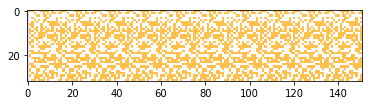

In [124]:
z1 = torch.transpose(torch.argmax(y,2), 1, 0).detach().cpu().long().numpy()
z2 = torch.transpose(o[:,:,1], 1, 0).detach().cpu().numpy()
z2 = np.round(z2).astype(int)
# print(z1[0,:10])
# print(z2[0,:10])
# print(np.bitwise_xor(z1[0, :10], z2[0, :10]))

from matplotlib.colors import ListedColormap
# plt.matshow(np.bitwise_xor(z1, z2), cmap=cmap)
cmap1 = ListedColormap(['w', 'blue'])
img1 = plt.imshow(np.bitwise_xor(z1, z2), cmap=cmap1, alpha=0.5)
cmap2 = ListedColormap(['w', 'orange'])
img2 = plt.imshow(z1, cmap=cmap2, alpha=0.7)
plt.savefig(os.path.join(out_dir, 'test.png'), transparent = True, 
            bbox_inches = 'tight', pad_inches = 0, dpi=300)
plt.show()

### Test with longer output

In [125]:
long_output_train_loader, \
long_output_test_loader, \
long_output_val_loader = create_ncopy_task(sequence_length=15, 
                                           n_copy=20,
                                           batch_size=batch_size,
                                           start_token=1,
                                           train_test_ratio=0.9, 
                                           train_valid_ratio=0.8)


transformer_f1 = task_transformer.evaluate(long_output_test_loader, True)
print(transformer_f1)

for x, y in long_output_test_loader:
    x = x.to(device)
    y = y.to(device)
    break

o = model.generate(x, start_token=START, max_len=y.shape[0])

torch.Size([16, 9000, 2]) torch.Size([301, 9000, 2])
torch.Size([16, 1000, 2]) torch.Size([301, 1000, 2])
.

/content/seq_seq_different.py:271: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tgt = torch.tensor(start_token).view(1,1,-1).repeat(src.shape[0],1,1).float()


...............................
Confusion Matrix: 
 [[116396  36864]
 [ 21283 126457]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.76      0.80    153260
           1       0.77      0.86      0.81    147740

    accuracy                           0.81    301000
   macro avg       0.81      0.81      0.81    301000
weighted avg       0.81      0.81      0.81    301000

(0.8130688192991085, 0.5077605657279491)


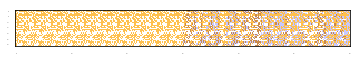

In [126]:
z1 = torch.transpose(torch.argmax(y[:],2), 1, 0).detach().cpu().long().numpy()
z1[:,0] = 1
z2 = torch.transpose(o[:,:,1], 1, 0).detach().cpu().numpy()
z2 = np.round(z2).astype(int)
# print(z1[0,:10])
# print(z2[0,:10])
# print(np.bitwise_xor(z1[0, :10], z2[0, :10]))

from matplotlib.colors import ListedColormap
# plt.matshow(np.bitwise_xor(z1, z2), cmap=cmap)
cmap1 = ListedColormap(['w', 'blue'])
img1 = plt.imshow(np.bitwise_xor(z1, z2), cmap=cmap1, alpha=0.7)
cmap2 = ListedColormap(['w', 'orange'])
img2 = plt.imshow(z1, cmap=cmap2, alpha=0.7)
plt.tick_params(labelsize=0, left=False, bottom=False)
plt.savefig(os.path.join(out_dir, 'longer_output.png'), transparent = True, 
            bbox_inches = 'tight', pad_inches = 0, dpi=300)
plt.show()

### Test with longer input

In [127]:
long_input_train_loader, \
long_input_test_loader, \
long_input_val_loader = create_ncopy_task(sequence_length=25, 
                                           n_copy=10,
                                           batch_size=batch_size, 
                                           start_token=1,
                                           train_test_ratio=0.9, 
                                           train_valid_ratio=0.8)


transformer_f1 = task_transformer.evaluate(long_input_test_loader, True)
print(transformer_f1)

for x, y in long_input_test_loader:
    x = x.to(device)
    y = y.to(device)
    break

o = model.generate(x, start_token=START, max_len=y.shape[0])

torch.Size([26, 9000, 2]) torch.Size([251, 9000, 2])
torch.Size([26, 1000, 2]) torch.Size([251, 1000, 2])
.

/content/seq_seq_different.py:271: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tgt = torch.tensor(start_token).view(1,1,-1).repeat(src.shape[0],1,1).float()


...............................
Confusion Matrix: 
 [[60616 63284]
 [42973 84127]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.49      0.53    123900
           1       0.57      0.66      0.61    127100

    accuracy                           0.58    251000
   macro avg       0.58      0.58      0.57    251000
weighted avg       0.58      0.58      0.57    251000

(0.6129226151228913, 0.7386819943785667)


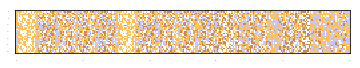

In [128]:
z1 = torch.transpose(torch.argmax(y[:],2), 1, 0).detach().cpu().long().numpy()
z1[:,0] = 1
z2 = torch.transpose(o[:,:,1], 1, 0).detach().cpu().numpy()
z2 = np.round(z2).astype(int)
# print(z1[0,:10])
# print(z2[0,:10])
# print(np.bitwise_xor(z1[0, :10], z2[0, :10]))

from matplotlib.colors import ListedColormap
# plt.matshow(np.bitwise_xor(z1, z2), cmap=cmap)
cmap1 = ListedColormap(['w', 'blue'])
img1 = plt.imshow(np.bitwise_xor(z1, z2), cmap=cmap1, alpha=0.7)
cmap2 = ListedColormap(['w', 'orange'])
img2 = plt.imshow(z1, cmap=cmap2, alpha=0.7)
plt.tick_params(labelsize=0, left=False, bottom=False)
plt.savefig(os.path.join(out_dir, 'longer_input.png'), transparent = True, 
            bbox_inches = 'tight', pad_inches = 0, dpi=300)
plt.show()